<a href="https://colab.research.google.com/github/priyarane879/Employee-Attrition-Analysis/blob/main/SQL_Capstone_1_Part_1_Priya_Naik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone 1 - Part 1

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1LfquyGkEO45x35q8yvYzke8lswCfBu89/view?usp=sharing)

### Context & Problem statement:

This is a fictional data set that contains atmost 30 features of categorical and discreet data. These data are kind of both numerical and text values which help in analysing the employee data from hiring to firing and on boarding to attrition.  Dive into current available HR metrics to reduce the attrition rate and improve employee performance. Employee attrition has long been a significant worry for organizations due to the substantial investments of time, money, and effort in training new employees. When an employee departs, it results in overall losses for the company, including the cost of replacing and retraining, as well as disruptions in workflow. Moreover, attrition can erode trust among remaining employees, creating additional management challenges.

The HR Attrition dataset, albeit fictional, serves the purpose of identifying key factors that could play a pivotal role in determining which employees are more likely to leave the company and who is likely to stay. In this capstone, we delve into a thorough analysis of these influential factors and employ predictive modeling techniques to gain a deeper understanding, ultimately enabling us to make accurate predictions regarding employee attrition.

### Business use case:

- Brief overview of attrition within the organization
- Explore the main factors that lead to employee attrition
- Propose relevant contributors to Performance Ratings and calculate their correlations

### Goals/ Metrics:

- Identify top reasons for attrition and recommend further action steps to improve
- Point out key factors that drive employee performance

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features, and target variable (attrition)
- Understanding the context and significance of each feature in relation to employee attrition

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables (e.g., employee tenure, performance scores) and do Exploratory Data Analysis (EDA)
- Analyzing factors contributing to employee attrition (e.g., age, job role, salary, work environment)
- Visualizing attrition rates across different demographic and employment-related variables
- Identifying correlations and patterns in the data to understand attrition drivers
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc.
- Make sure the plots are correctly labelled.
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

### 1 Data Retrieval

In [29]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [30]:
#connecting with the google drive for reading the file from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#reading file from drive
df_HR = pd.read_csv('/content/drive/MyDrive/Elevate Pro/SQL/HR-Analytics.csv')

In [32]:
# Dataset Rows & Columns count
#dataframe.shape function gives us number of column and rows.
df_HR.shape

(1470, 35)

In [33]:
# Dataset Info
#using info method we get information about columns, its dtypes, number of entries , number of non-null values.
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [34]:
df_HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [35]:
df_HR.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


Observation:-

*   The dataset consists of 1,470 rows and 35 columns, with no missing
    values in any of the variables. It includes 9 categorical variables and 26 numerical variables. The dependent variable, "Attrition," has two unique values.


### 2. Data preprocessing

2.1  Checking for Null Value

In [36]:
df_HR.isna().sum() #checking for null value

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


2.2 Checking for Duplicate Value

In [37]:
# Dataset Duplicate Value Count
#Checking for duplicate rows in dataframe
len(df_HR[df_HR.duplicated()])

0

2.3 Checking Outlier in Numerical Variable

* To detect outliers, I will utilize a box plot, which provides a five-number summary of the variable, including the minimum, first quartile (Q1), median, third quartile (Q3), and maximum, while also highlighting potential outliers beyond the interquartile range (IQR).

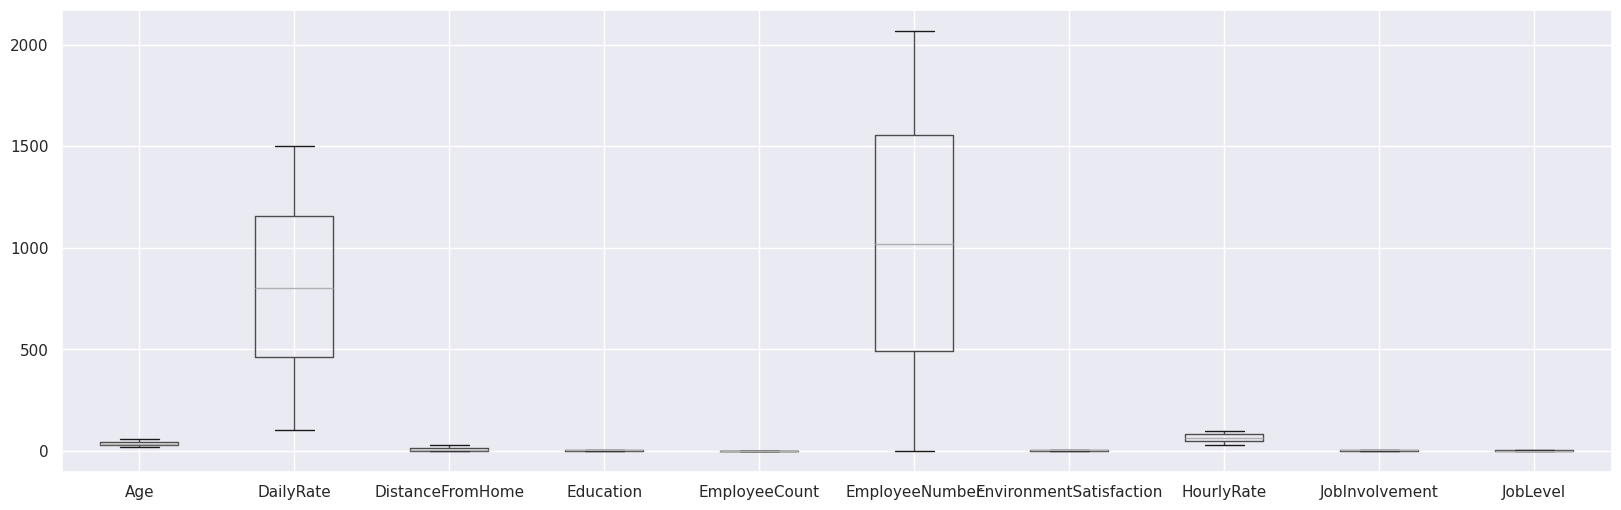

In [38]:
#here I have taken 10 features at time so that we can see properly.
df=df_HR[['Age',  'DailyRate', 'DistanceFromHome', 'Education',  'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction',  'HourlyRate',
       'JobInvolvement', 'JobLevel']]
fig, ax = plt.subplots(figsize=(20, 6))
df.boxplot()
plt.show()

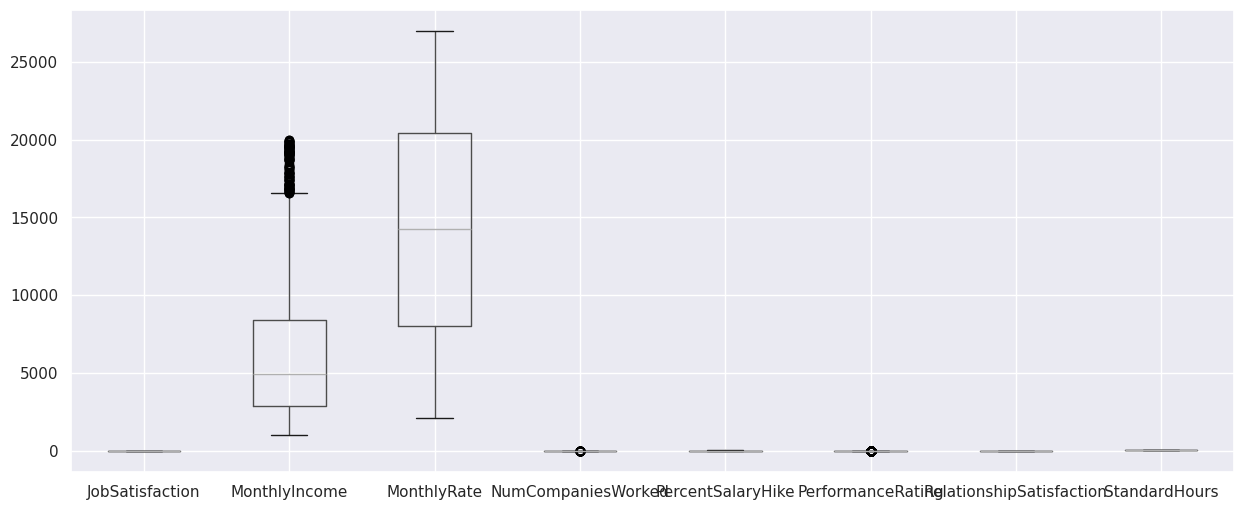

In [39]:
df=df_HR[['JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours']]
fig, ax = plt.subplots(figsize=(15, 6))
df.boxplot()
plt.show()

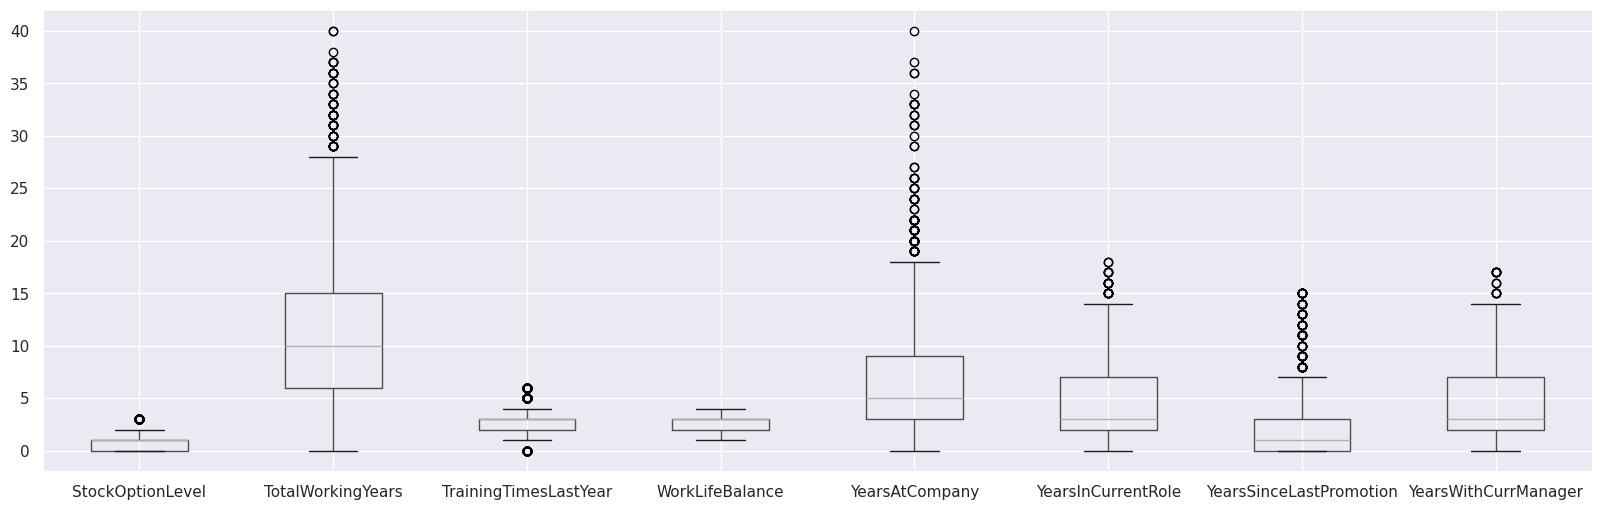

In [40]:
df=df_HR[['StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
fig, ax = plt.subplots(figsize=(20, 6))
df.boxplot()
plt.show()

**Observation**
* There are outlier values in the Monthly Income column, which could potentially be attributed to employees holding higher-level positions with correspondingly higher compensation packages.
* Similarly, values such as StockOptionLevel ranging from 0 to 3 and TotalWorkingYears exceeding 28 are plausible and may represent unique cases.
* Therefore, I will not remove these rows to avoid losing valuable information.

2.4 Encoding categorical variables

In [41]:
# Let's check for what are the values present in each categorical variable
for col in df_HR.columns:
    if df_HR[col].dtype == 'object':
        print(f"{col}: {df_HR[col].unique()}")


Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


 **Observation**
 *  I have observed that the following features contain categorical values: 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', and 'OverTime'.
 * Categorical variables with 2 or fewer categories will be encoded using label encoding, while the rest will be encoded using One-Hot Encoding.
 * As 'Over18' has only one value that means it doesn't contribute any variance to data. So I will drop it.



In [42]:

# Label Encoding for binary categorical variables
binary_cols = ['Gender', 'OverTime']
df_cat=pd.DataFrame()
le = LabelEncoder()
for col in binary_cols:
    df_cat[col] = le.fit_transform(df_HR[col])

df_HR.drop('Over18', axis=1, inplace=True) # deopping column over18 asit is having only 1 unique value

In [43]:
# One-Hot Encoding for nominal categorical variables
nominal_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
df_num = pd.get_dummies(df_HR, columns=nominal_cols, drop_first=True)


# Display transformed dataset info
print(df_num.info())
print(df_num.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1470 non-null   int64 
 1   Attrition                          1470 non-null   object
 2   DailyRate                          1470 non-null   int64 
 3   DistanceFromHome                   1470 non-null   int64 
 4   Education                          1470 non-null   int64 
 5   EmployeeCount                      1470 non-null   int64 
 6   EmployeeNumber                     1470 non-null   int64 
 7   EnvironmentSatisfaction            1470 non-null   int64 
 8   Gender                             1470 non-null   object
 9   HourlyRate                         1470 non-null   int64 
 10  JobInvolvement                     1470 non-null   int64 
 11  JobLevel                           1470 non-null   int64 
 12  JobSat

###3. Feature Engineering & EDA

3.1 Adding New Feature

In [44]:
# Create a new feature: Employee Tenure
df_HR["EmployeeTenure"] = df_HR["TotalWorkingYears"] - df_HR["YearsAtCompany"]

####3.2 Univariate Analysis

3.2.1 Univariate Analysis of Attrition

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64
 


<Axes: ylabel='count'>

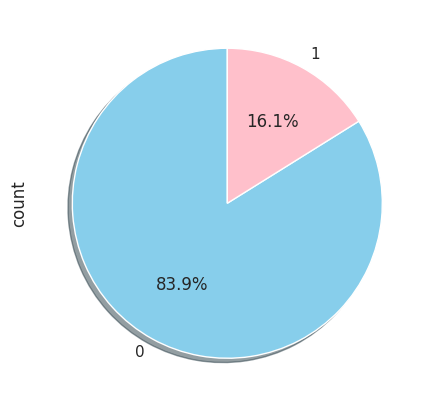

In [45]:

# Chart - 1 visualization code
# Dependant Column Value Counts
print(df_HR.Attrition.value_counts(normalize=True)) #This will gives us no. of occurance of each unique value from TenYearCHD column
print(" ")
# Dependant Variable Column Visualization
df_HR['Attrition'].value_counts().plot(kind='pie',
                              figsize=(5,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['0','1'],
                               colors=['skyblue','pink'],
                               explode=[0,0]
                              )#plotting pie chart of TenYearCHD column

3.2.2 Univariate Analysis of categorical Variables


BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64


Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64


EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64


JobRole
Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
Name: proportion, dtype: float64


MaritalStatus
Married     0.457823
Single      0.319728
Divorced    0.222449
Name: proportion, dtyp

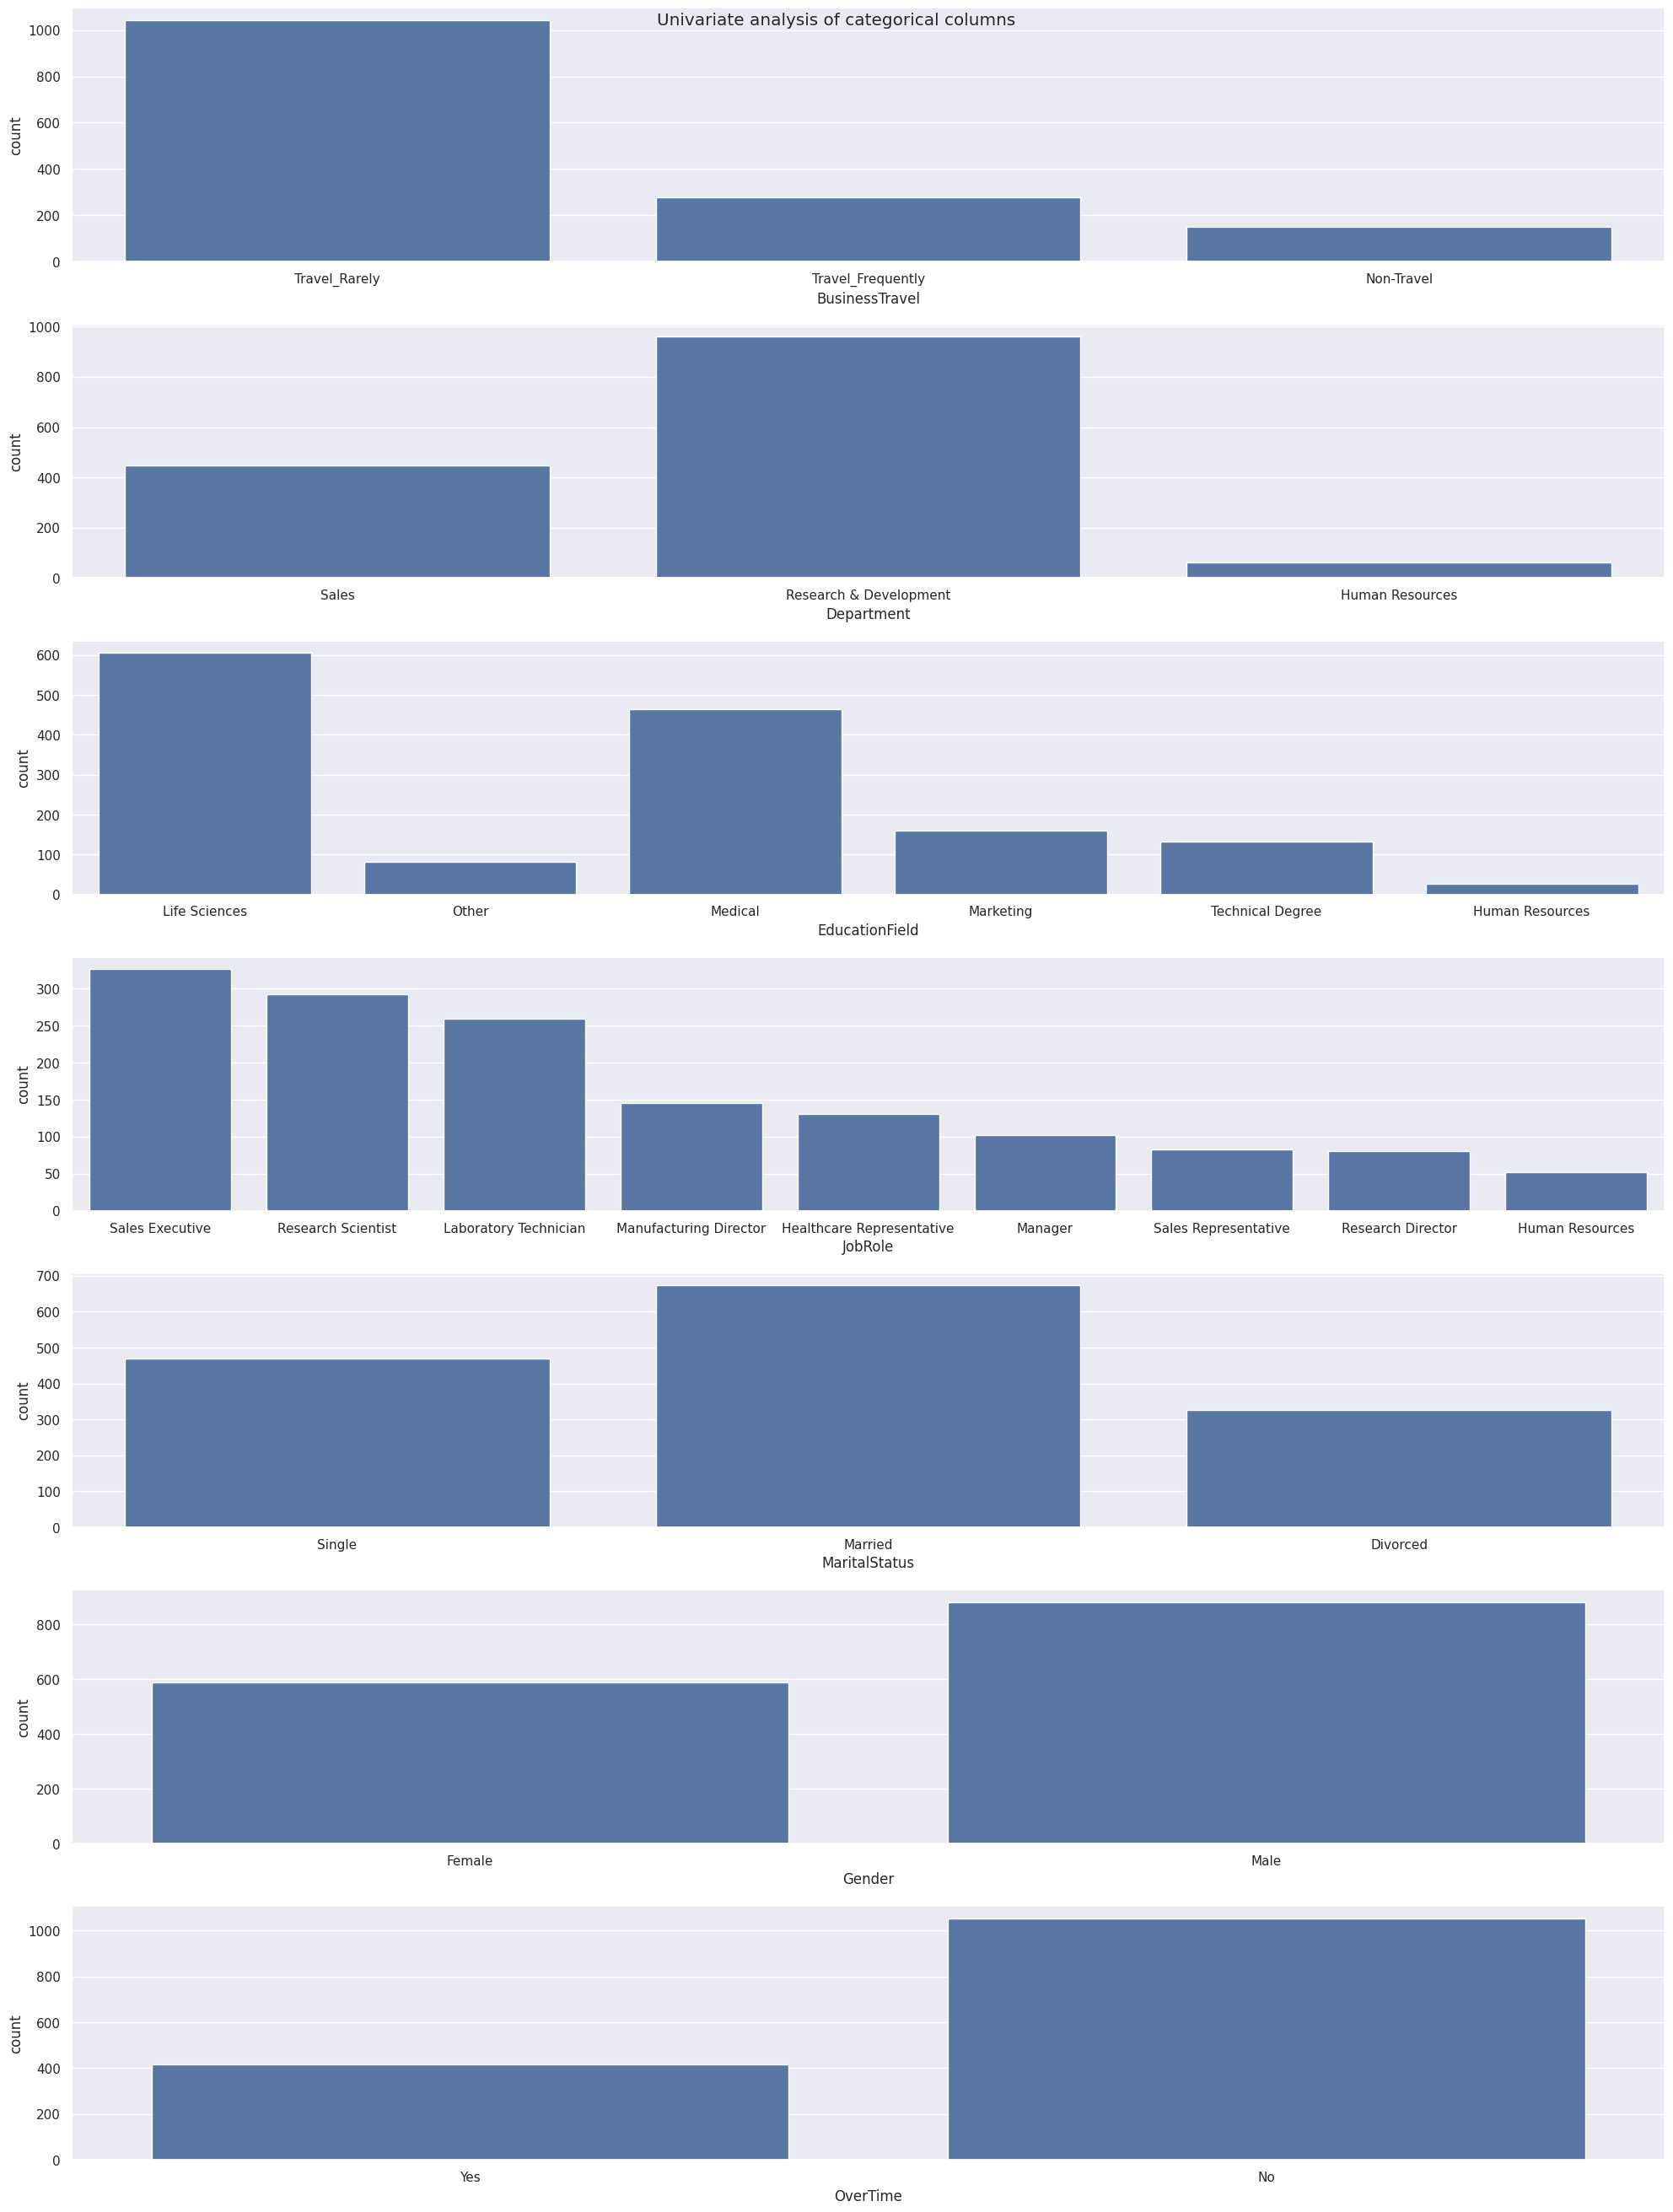

In [46]:
list_categorical_column=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus','Gender', 'OverTime']
plt.figure(figsize = (20,30));# setting fig. size
plt.suptitle('Univariate analysis of categorical columns')# title for all subplot
for i,column in enumerate(list_categorical_column) :
    print("")
    print(df_HR[column].value_counts(normalize=True))# printing unique values an it's count from categorical column.
    print("")
    plt.subplot(8,1,i+1)# subplot provide multiple plot in single figure
    sns.countplot(x = column, data=df_HR)#plotting count plot for each categorical column
    plt.tight_layout()# automatically adjusting subplot to give specified padding


**Observation**

Based on the univariate analysis of categorical columns, here are some observations:

*  **BusinessTravel**:- Most employees travel rarely, with fewer in the "Travel_Frequently" and "Non-Travel" categories.

*   **Department**:- "Research & Development" has the highest number of employees.
"Human Resources" has the fewest employees.

* **EducationField**:-"Life Sciences" and "Medical" are the most common education fields.
Other fields like "Marketing" and "Technical Degree" have fewer employees.

* **JobRole**:-"Sales Executive" and "Research Scientist" are the most common job roles.
Roles like "Human Resources" and "Research Director" have relatively fewer employees.

* **MaritalStatus**:- "Married" employees are the majority.
"Single" and "Divorced" employees are present in almost equal proportions.

* **Gender**:-The distribution of Male and Female employees appears fairly balanced.

* **OverTime**:- A significant portion of employees do not work overtime, while a smaller proportion do.







3.2.3 Univariate Analysis of Numerical Variables

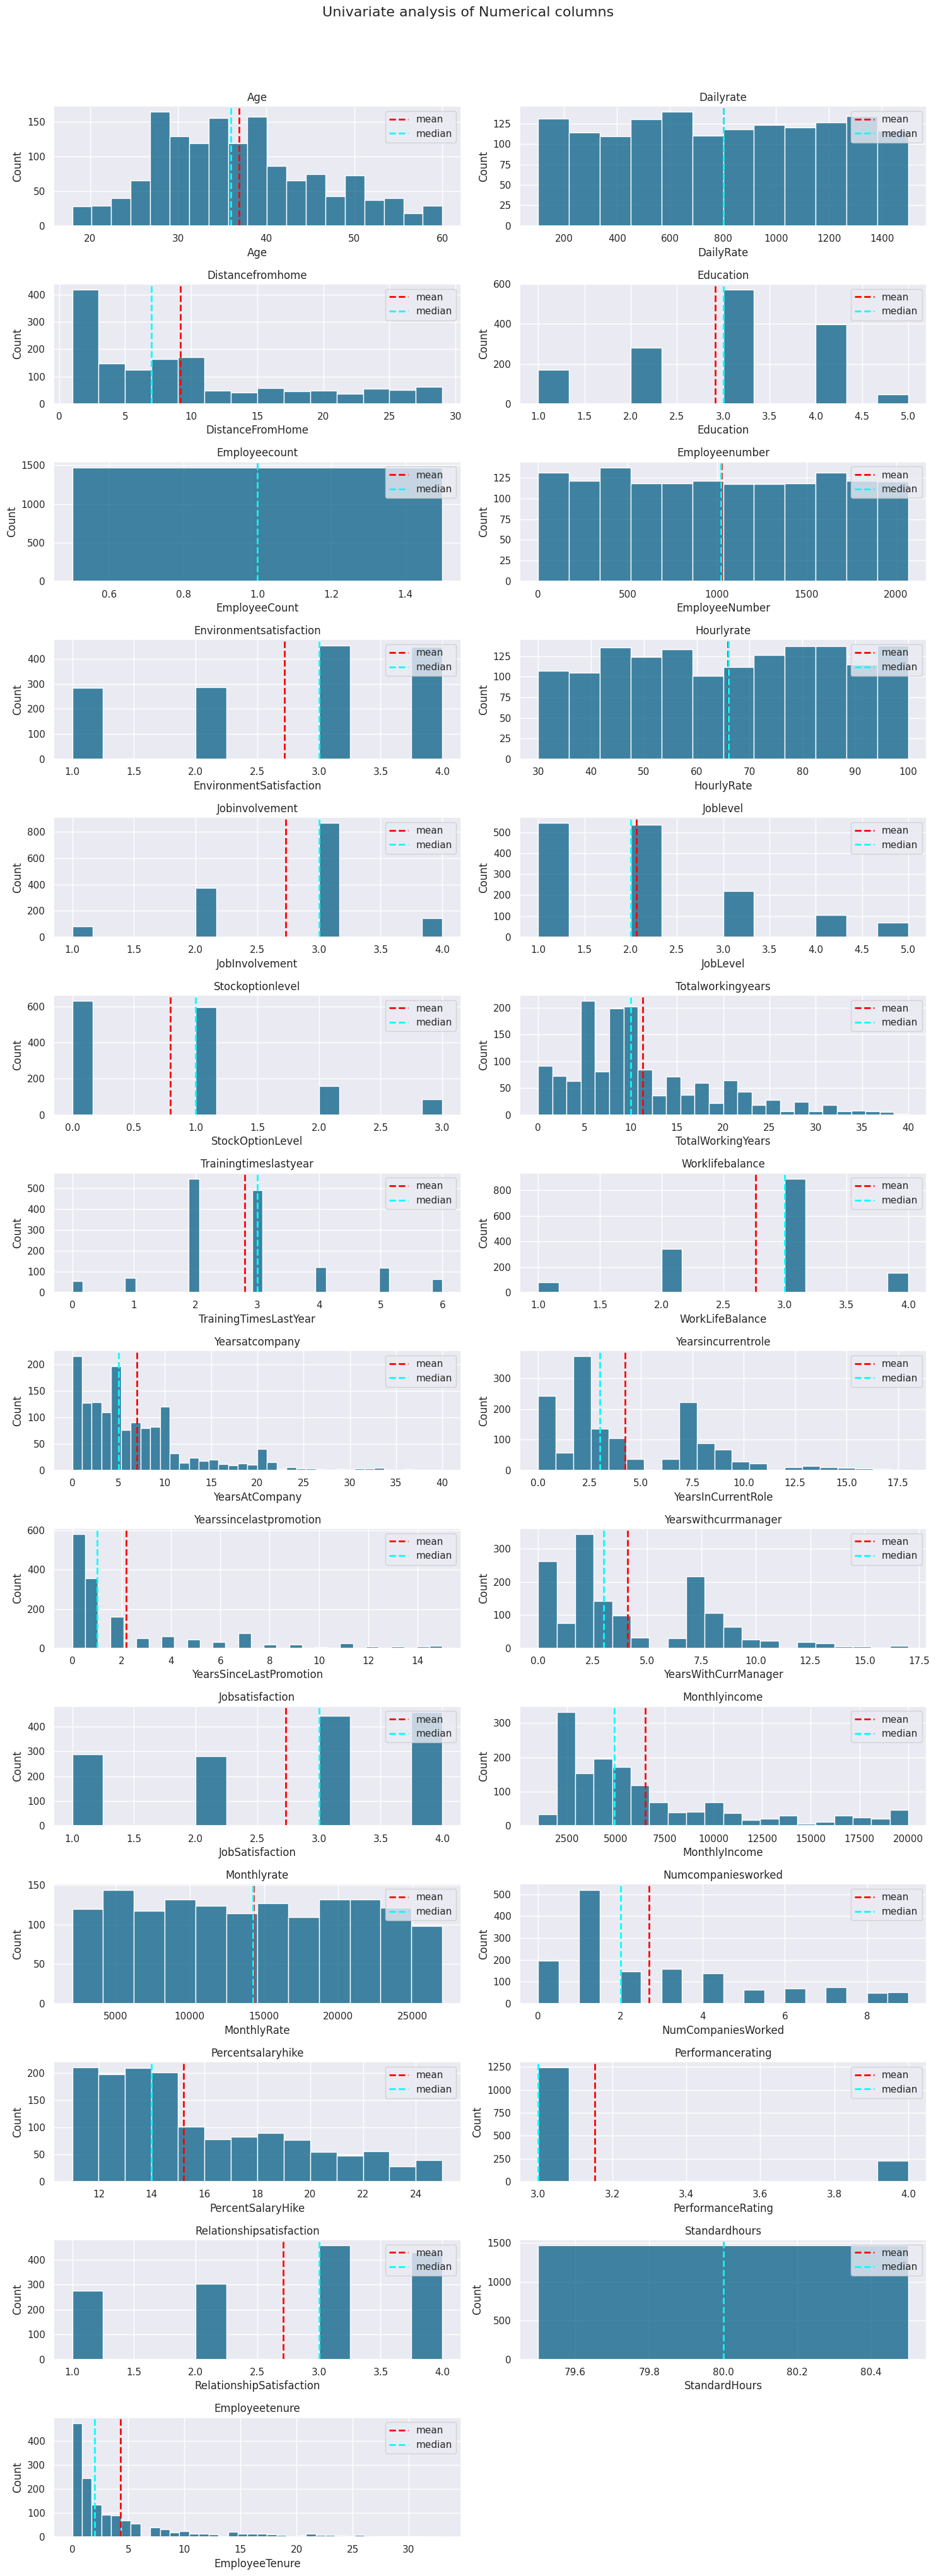

In [47]:
# Chart - 3 visualization code
# visualisation code for univariate analysis of numerical column
list_numerical_column=['Age',  'DailyRate', 'DistanceFromHome', 'Education',  'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction',  'HourlyRate',
       'JobInvolvement', 'JobLevel' ,'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours','EmployeeTenure']#taking numerical variable name into list.

plt.figure(figsize = (15,40)); # setting fig.size
plt.suptitle('Univariate analysis of Numerical columns',fontsize=16, y=1.02)#common title for all plot
for i,column in enumerate(list_numerical_column):

    plt.subplot(14,2,i+1);
    sns.histplot(df_HR[column], color = '#055E85');#plotting distibution plot for each numeric variable
    plt.axvline(df_HR[column].mean(), color='red', linestyle='dashed', linewidth=2,label= 'mean');  #plotting mean line for variable
    plt.axvline(df_HR[column].median(), color='cyan', linestyle='dashed', linewidth=2,label='median');  #plotting median line for variable
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')#legend for each subplot
    plt.title(f'{column.title()}'); #title for each subplot
    plt.tight_layout();# automatically adjusting subplot to give specified padding


In [48]:
print(df_HR['StandardHours'].value_counts()) # checking for no. of unique value in StandardHours column

print(df_HR['EmployeeCount'].value_counts()) # checking for no. of unique value in EmployeeCount column


StandardHours
80    1470
Name: count, dtype: int64
EmployeeCount
1    1470
Name: count, dtype: int64


* Based on the graph and value counts, it was observed that the variables **StandardHours** and **EmployeeCount** contain only a single value, contributing no variance to the data. Therefore, I decided to remove them.

In [49]:
df_HR = df_HR.drop(columns=['StandardHours','EmployeeCount'])

**Observation**


*   **Age**:- The distribution is slightly right-skewed, with most employees between 25 to 40 years old. Mean and median are close, indicating a nearly normal distribution.
*   **DailyRate & MonthlyRate**:- These values appear to be uniformly distributed, suggesting no clear concentration in a specific range.

* **DistanceFromHome**:- Highly skewed distribution, with most employees living close to the workplace (0-5 km).Some employees have significantly longer commutes.

* **Education**:- The dataset has a limited range (1 to 5), indicating categorical representation.Most employees have education levels 2 or 3.

* **Job Satisfaction, Environment Satisfaction, Work-Life Balance**:-
These variables appear to have distinct groups (likely categorical with numerical representation).Certain levels (like 3 and 4) appear more frequently.

* **TotalWorkingYears & YearsAtCompany**:-
These distributions are right-skewed, with most employees having less than 10 years of experience.A small proportion of employees have extensive experience.

* **YearsSinceLastPromotion**:-
Majority of employees have had few promotions in recent years.
A long tail suggests some employees have spent many years without promotion.

* **PerformanceRating**:-
One category is overwhelmingly dominant, indicating lack of variability in this feature.

* **EmployeeTenure**:- It has right skewed distribution, possibly high attrition among new hires or early-tenure employees.


3.2.3 Bivariate Analysis of categorical Variables

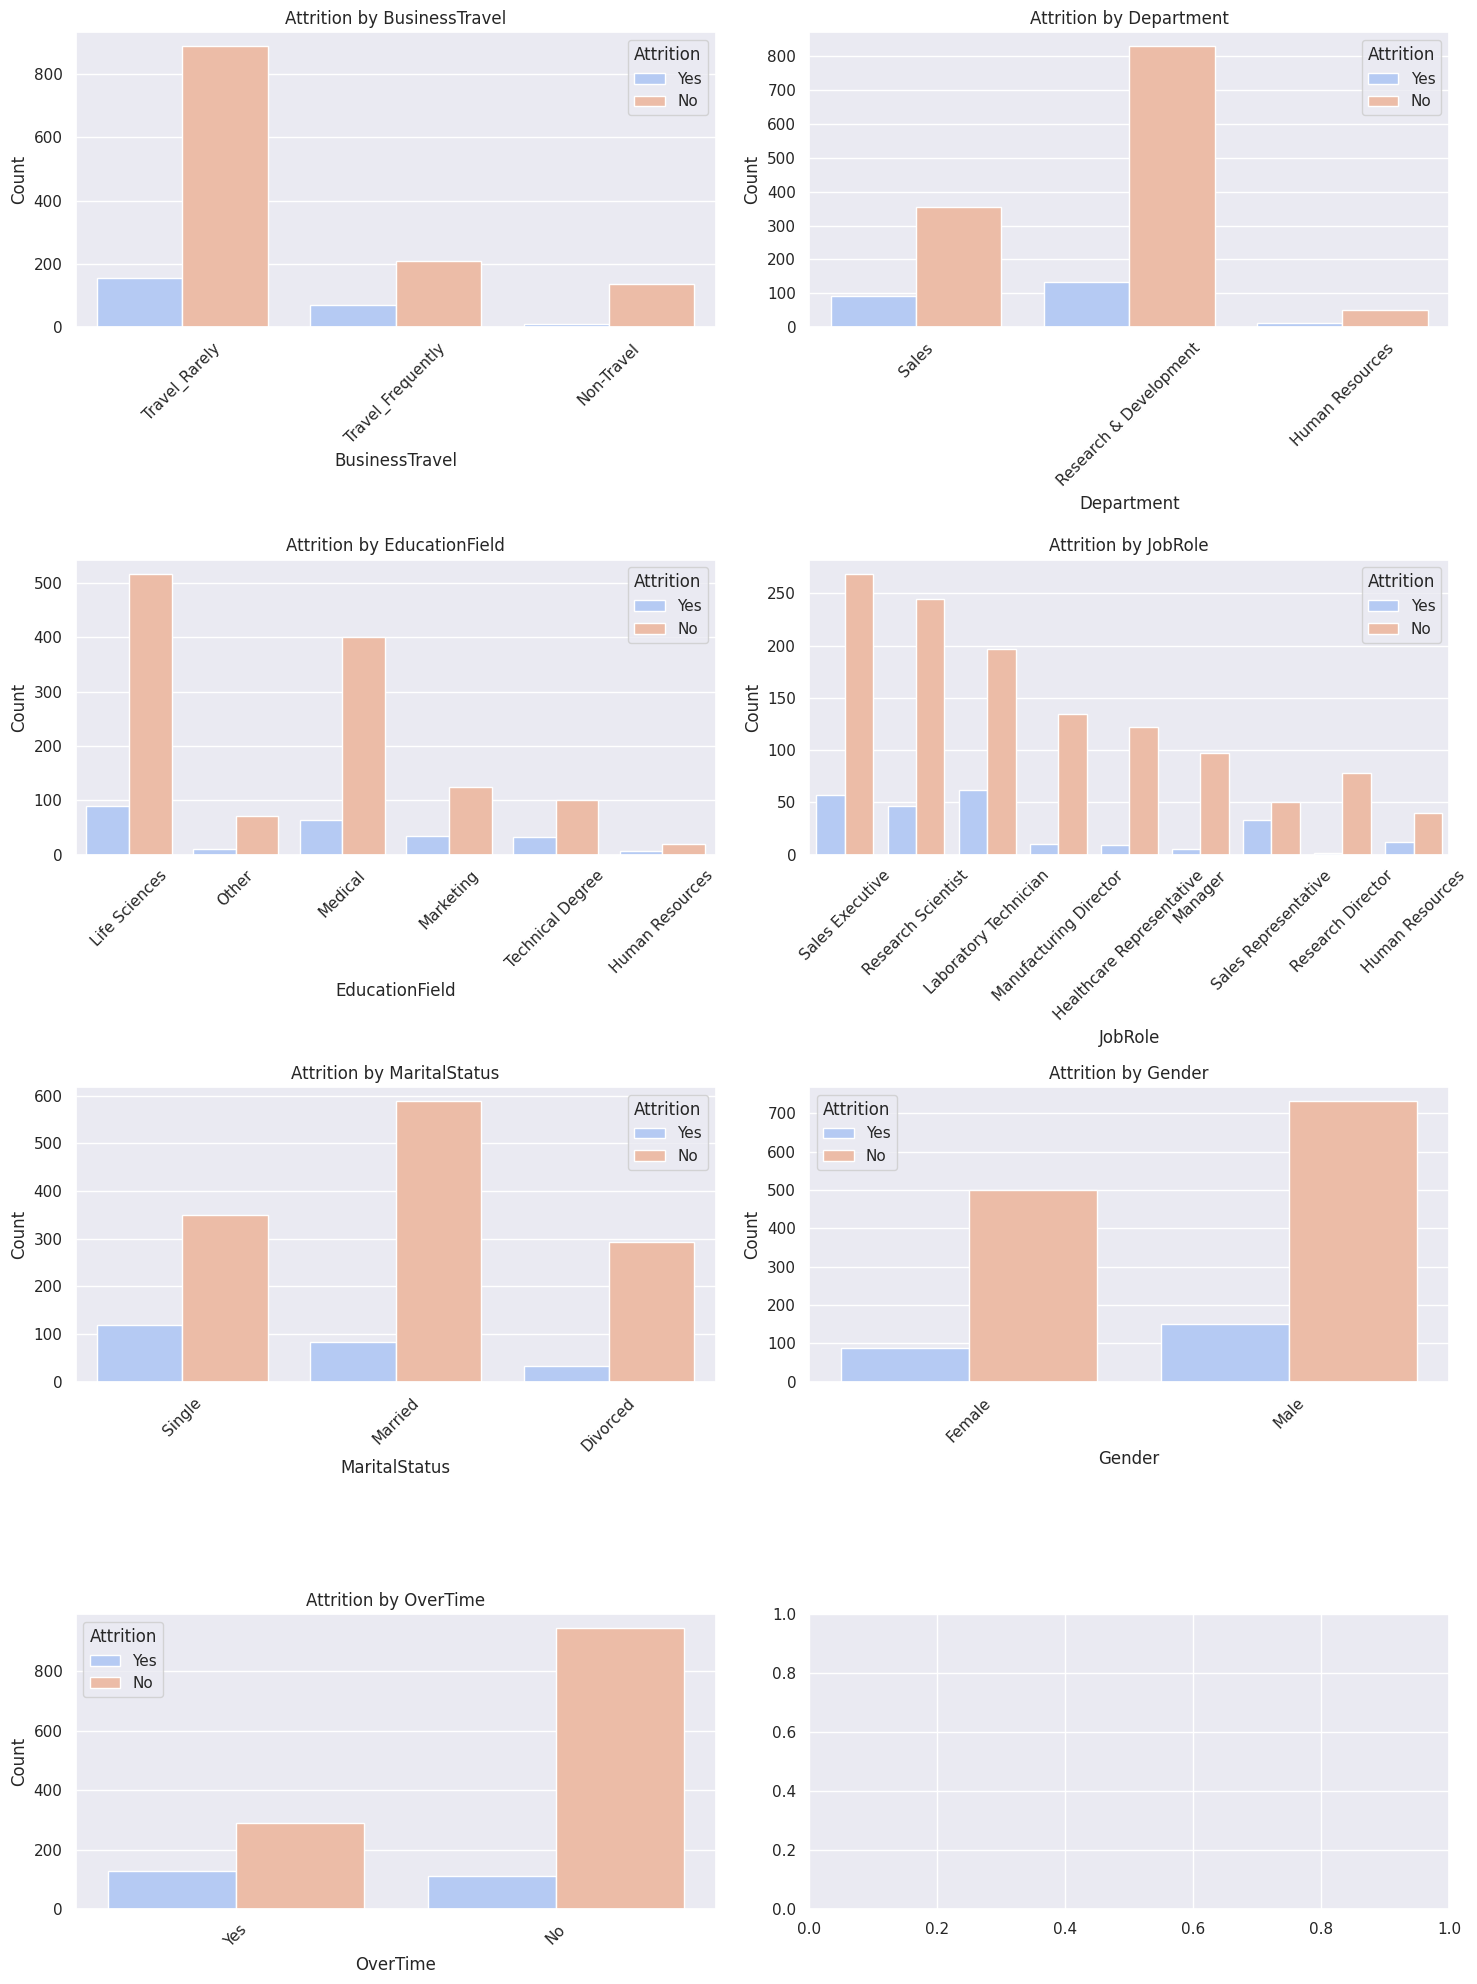

In [50]:
# Chart - 4 visualization code
import matplotlib.pyplot as plt
import seaborn as sns
# List of categorical columns
list_categorical_column = ['BusinessTravel', 'Department', 'EducationField',
                           'JobRole', 'MaritalStatus', 'Gender', 'OverTime']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Loop through each categorical variable
for i, col in enumerate(list_categorical_column):
    if i < len(axes):  # Avoid index error if more categories
        sns.countplot(x=col, hue="Attrition", data=df_HR, palette="coolwarm", ax=axes[i])
        axes[i].set_title(f"Attrition by {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis="x", rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**Observation:-**
1. **Business Travel:**

*   Employees who travel frequently or rarely have higher attrition compared to those who do not travel
*   "Travel_Rarely" has the highest number of employees, but still shows some attrition.


2. **Department:**:-

* Research & Development has the highest number of employees, but also a notable portion experiencing attrition.
*Sales also has a significant attrition rate, while Human Resources has the least number of employees and attrition.

3. **Education Field:**

* Employees in "Life Sciences" and "Medical" fields form the majority, and both show attrition.
* Other education fields, such as Marketing and Technical Degree, have lower total employees but still experience attrition.

4. **Job Role:**

* Sales Executives and Research Scientists have high attrition rates.
Some roles, like Research Director, have fewer employees and lower attrition.

5. **Marital Status:**

* Single employees experience higher attrition compared to married and divorced employees.
* Married employees have the lowest attrition rates.

6. **Gender:**

* Male employees are the majority, but attrition is visible in both genders.
* There is no strong indication that gender plays a major role in attrition.

8. **Overtime:**

* Employees who work overtime experience higher attrition compared to those who do not.


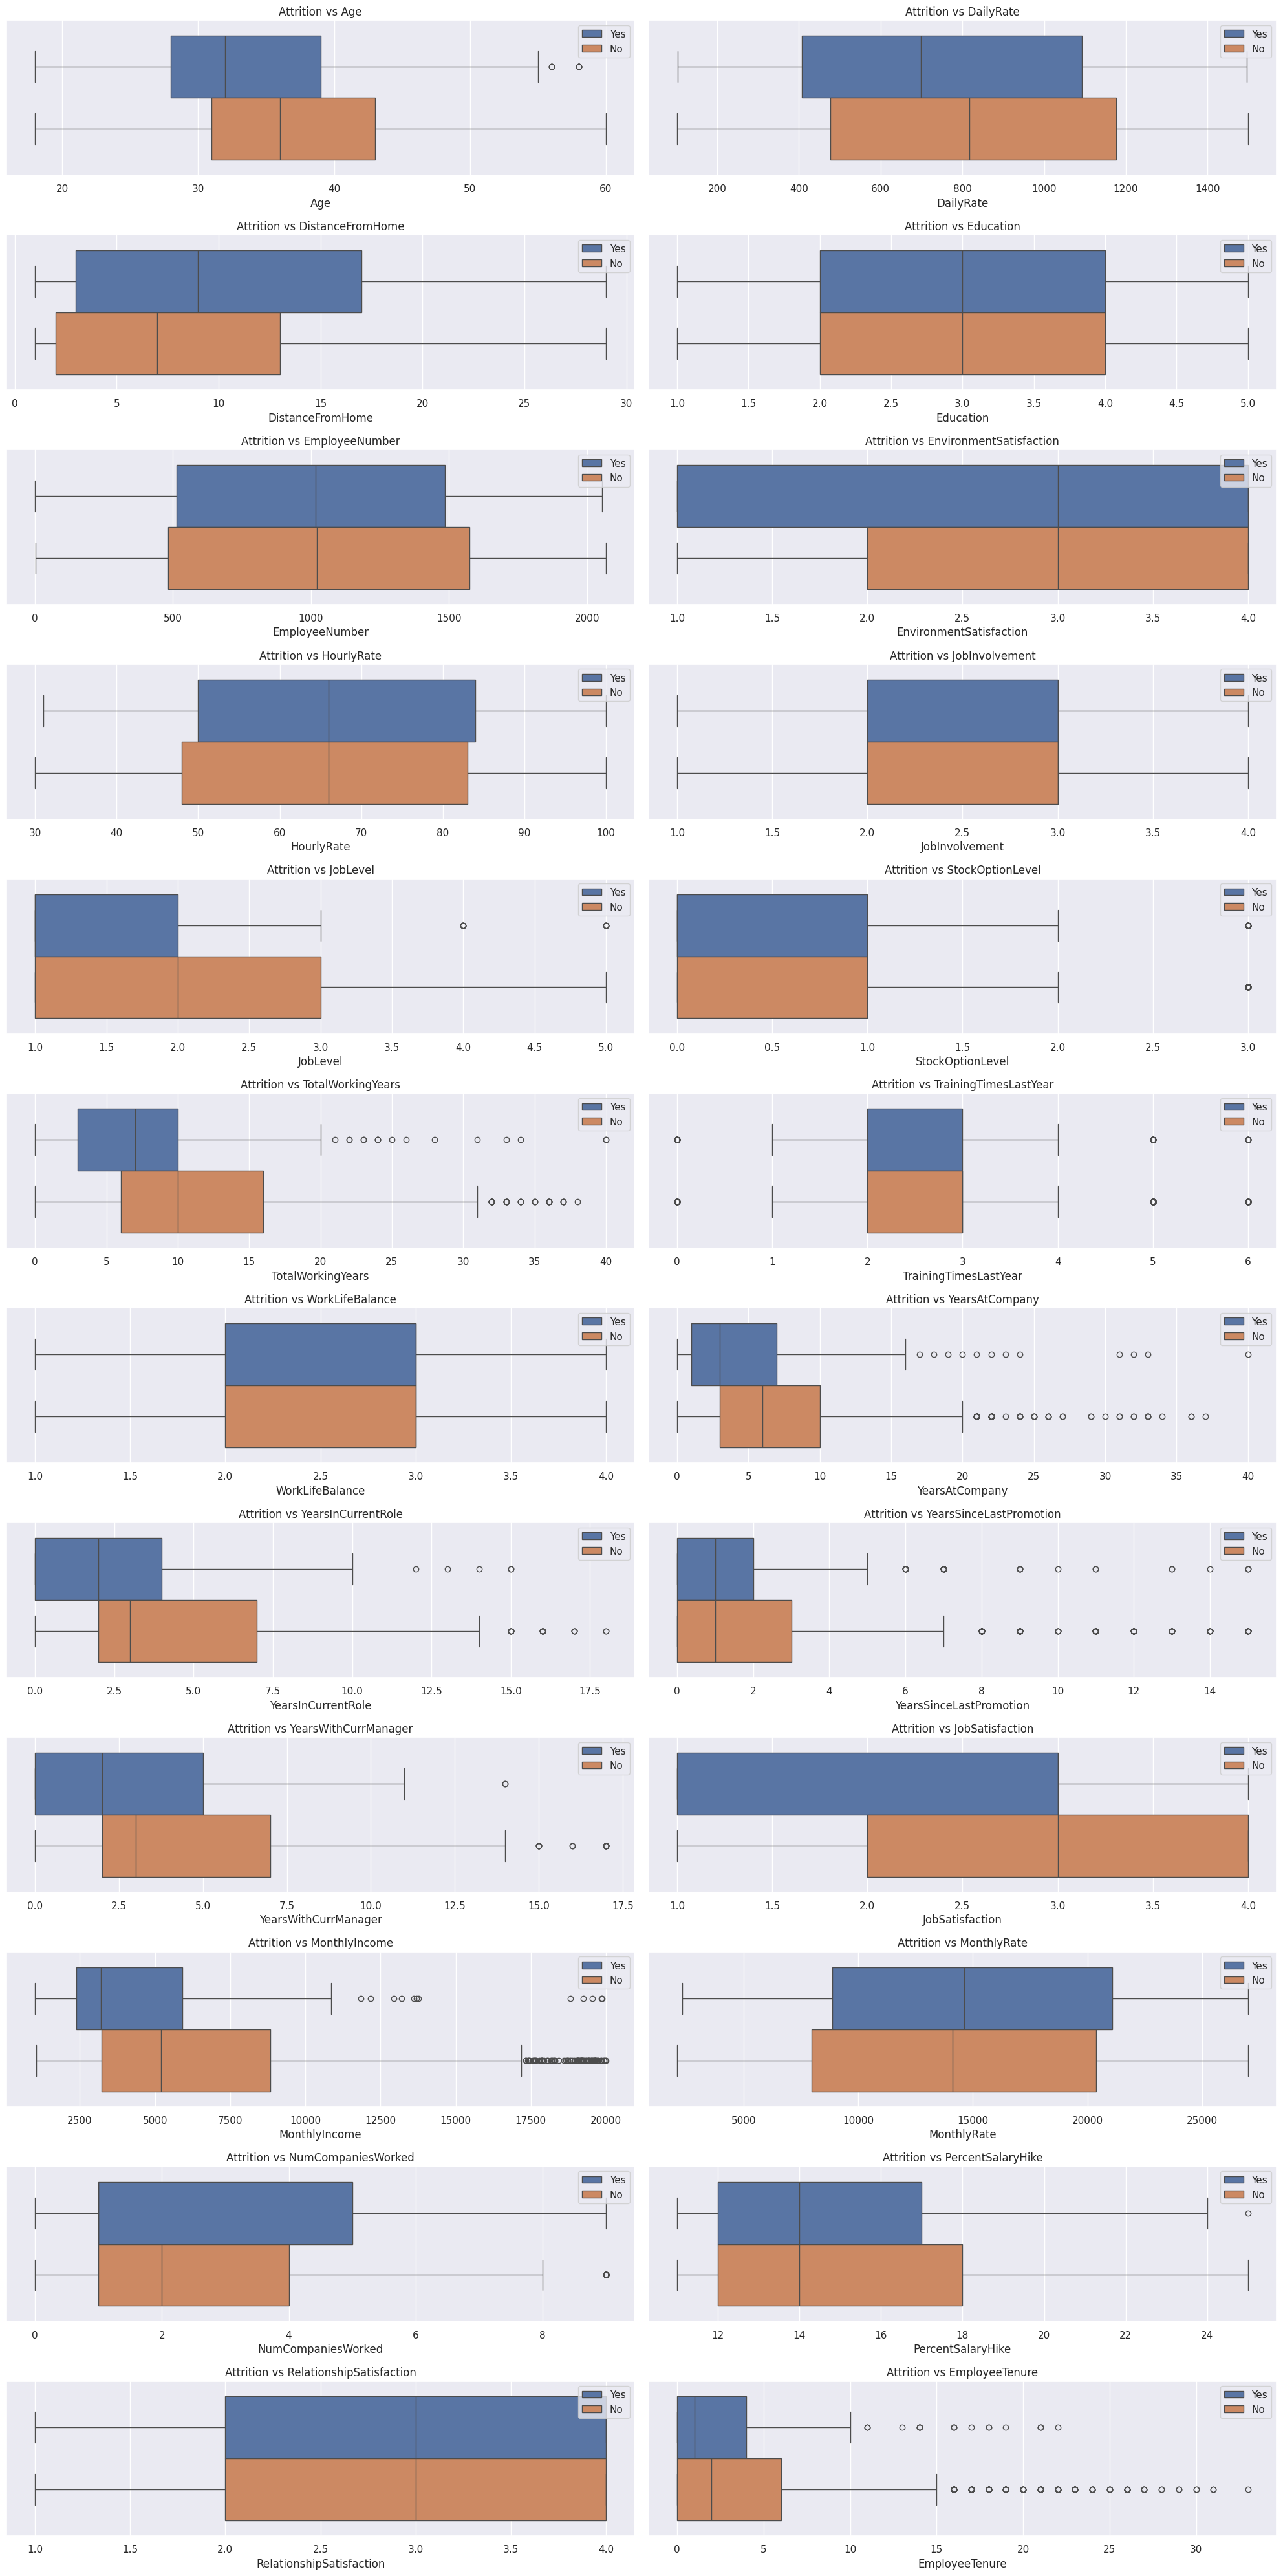

In [51]:

# List of numerical features
numeric_features = [
   'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike',  'RelationshipSatisfaction',
       'EmployeeTenure'
]

# Create line plots
plt.figure(figsize=(20, 40))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(12, 2, i)
    sns.boxplot(x=df_HR[col], hue=df_HR['Attrition'])
    plt.title(f"Attrition vs {col}")
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

####**Observation:-**
1. **Attrition vs Age:-**
Employees who leave ("Yes") are generally younger than those who stay ("No").
The median age of employees who stay is higher.
There are a few outliers in the older age group.


2. **Attrition vs Daily Rate:-**
The distribution of daily rate for employees with attrition is similar to those who stay.
Some outliers exist at the higher end.


3. **Attrition vs Distance from Home:-**
Employees who leave have a slightly higher median distance from home.
Some extreme cases show employees traveling long distances.


4. **Attrition vs Education:-**
No significant difference between employees who stay and those who leave.
The education level distribution remains similar.


5. **Attrition vs Employee Number:-**
Employee number is simply an identifier, so no meaningful conclusion can be drawn.

6. **Attrition vs Environment Satisfaction:-**
Employees with low environment satisfaction are more likely to leave.
Those who stay tend to have higher satisfaction scores.


7. **Attrition vs Hourly Rate:-**
No major difference observed in hourly rates between employees who leave and those who stay.


8. **Attrition vs Job Level:-**
Employees with lower job levels tend to have higher attrition.
Higher job levels (3 and above) show fewer cases of attrition.


9. **Attrition vs Stock Option Level:-**
Employees with lower stock option levels tend to leave more often.


10. **Attrition vs Total Working Years:-**
Employees with fewer total working years are more likely to leave.
Employees with longer tenure (15+ years) tend to stay.


11. **Attrition vs Training Times Last Year:-**
Employees who receive little to no training have higher attrition rates.
Insight: Investing in training programs could enhance retention.

12. **Attrition vs Years at Company:-**
Employees with fewer years at the company are more likely to leave.
Attrition decreases as tenure increases.


13. **Attrition vs Years in Current Role:-**
Employees with fewer years in their current role have higher attrition.
More experienced employees tend to stay.


14. **Attrition vs Years Since Last Promotion:-**
Employees who haven’t been promoted for a long time have lower attrition.
Employees who recently joined but didn’t get promoted tend to leave.
Insight: Career stagnation doesn’t seem to drive attrition, but lack of early promotions might.

15. **Attrition vs Job Satisfaction:-**
Employees with low job satisfaction are more likely to leave.
Employees who stay tend to have higher job satisfaction.
Insight: Improving job satisfaction through engagement and recognition could reduce attrition.

16. **Attrition vs Monthly Income:-**
Employees with lower monthly income tend to leave.
Higher earners show lower attrition.


17. **Attrition vs Number of Companies Worked:-**
Employees who have worked at multiple companies before tend to leave more.
Insight: Employees with a history of frequent job changes may need stronger retention efforts.

18. **Attrition vs Relationship Satisfaction:-**
Employees with lower relationship satisfaction are more likely to leave.
Insight: Fostering good workplace relationships and culture is key for retention.

19. **Attrition vs Percent Salary Hike:-**
Employees with lower salary hikes tend to leave more frequently.
Insight: Regular salary increments could improve employee retention.

20. **Attrition vs Employee Tenure:-**
Employees with very low tenure (0-5 years) have the highest attrition.
Longer-tenured employees (10+ years) rarely leave.


<ipython-input-52-b3cf41e445d5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})


Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EmployeeTenure             -0.082147
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64


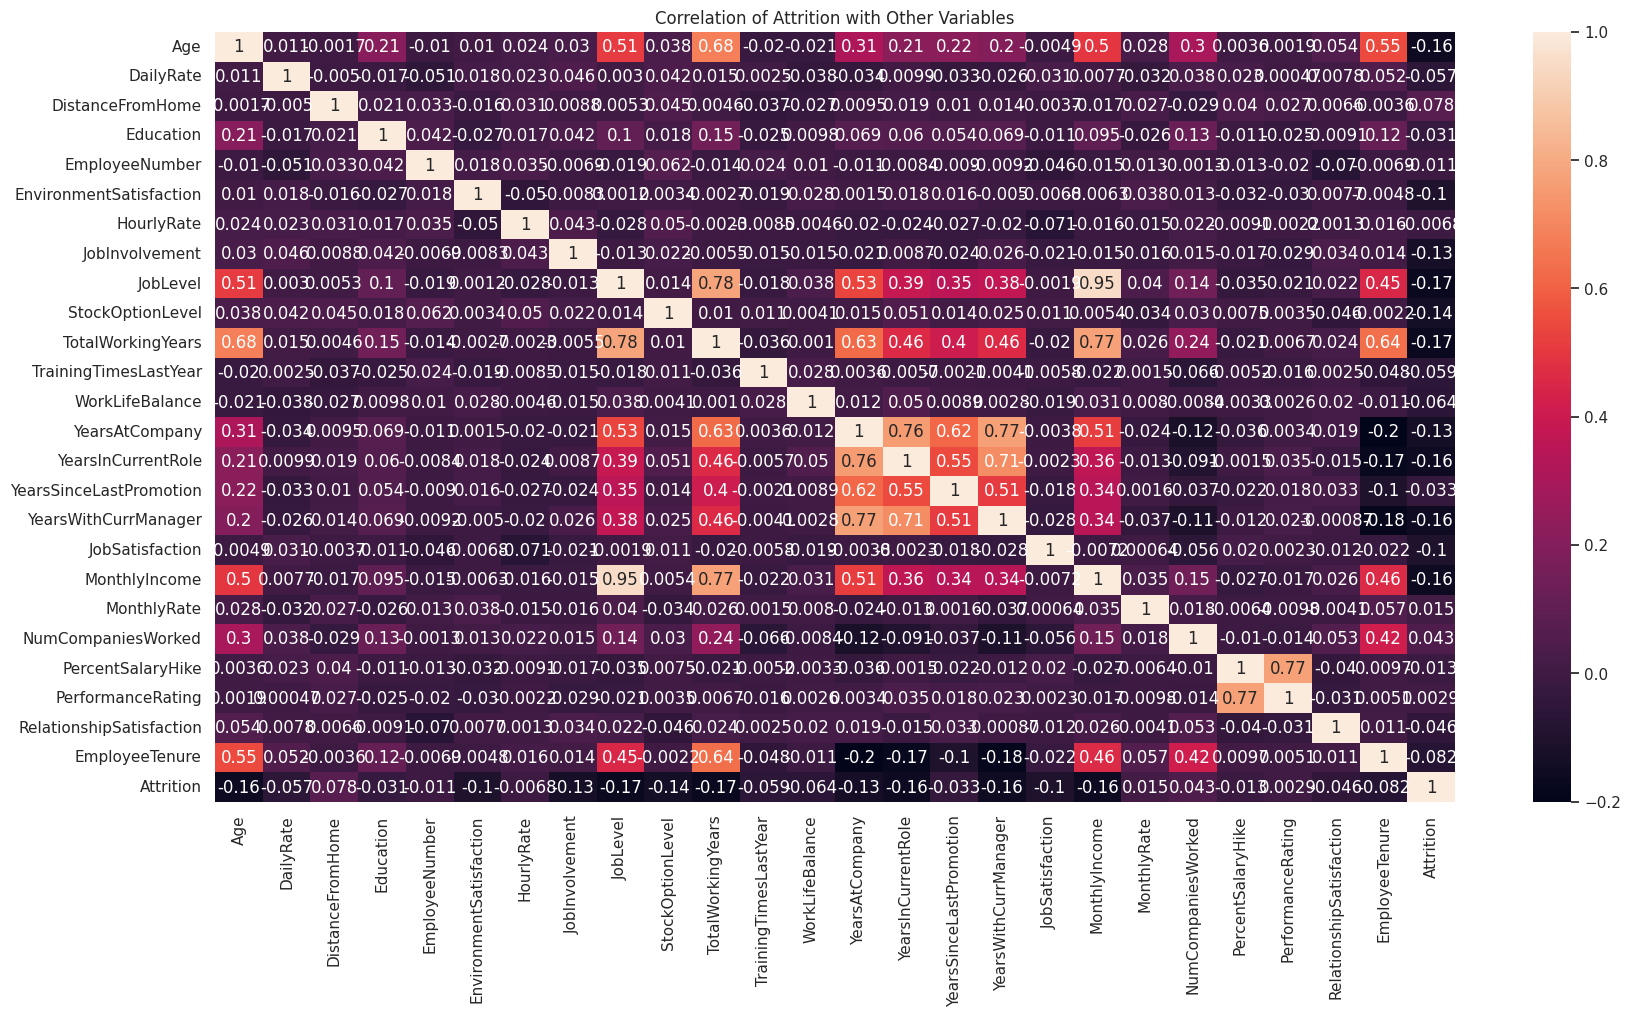

In [52]:

df=df_HR[['Age',  'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction',  'HourlyRate',
       'JobInvolvement', 'JobLevel' ,'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'EmployeeTenure','Attrition']]
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Compute correlation with Attrition
correlation_matrix = df.corr()["Attrition"].sort_values(ascending=False)

# Display top correlations
print(correlation_matrix)


plt.figure(figsize=(20,10)) # setting chart/figure size
sns.heatmap(df.corr(),annot=True) # plot heatmap
plt.title('Co-relation of the columns') # plotting title

# Labels and title
plt.title("Correlation of Attrition with Other Variables")

# Show plot
plt.show()

**Observation :-**
* **Age (-0.55 correlation with Attrition)**: Older employees are less likely to leave the company.

* **Job Level (-0.45 correlation with Attrition)**: Higher job levels have lower attrition rates.

* **Total Working Years (-0.64 correlation with Attrition)** : Employees with more experience tend to stay longer.

* **Years at Company (-0.2 correlation with Attrition)**: Employees who have been with the company for a longer period tend to stay.

* **Years in Current Role (-0.17 correlation with Attrition)**: Longer tenure in a current role reduces attrition.

* **Years Since Last Promotion (-0.12 correlation with Attrition)**: Frequent promotions may help retain employees.

* **Stock Option Level (-0.22 correlation with Attrition)**: Employees with stock options are less likely to leave.

* **Monthly Income (-0.46 correlation with Attrition)**: Higher salaries are associated with lower attrition.

* **Number of Companies Worked (0.42 correlation with Attrition)**: Employees who have worked at multiple companies are more likely to leave.

* **Employee Tenure (-0.57 correlation with Attrition)**: Longer tenure is linked to lower attrition.



##**Solution to Business Objective**



1.   Focus on Younger Employees - They leave more often; career growth and engagement strategies are crucial.
2.  Improve Work Environment & Job Satisfaction - Higher satisfaction correlates with lower attrition
3. Enhance Career Growth & Promotions - Employees with fewer years in a role and no promotions tend to leave.

4. Offer Competitive Compensation - Higher salaries and regular hikes reduce attrition.
5. Provide Training & Development - Employees with little training tend to leave.
6. Work-Life Balance Matters - Employees with longer commutes and lower satisfaction levels leave more often.